In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/apple/Desktop/bank-case/data-cleaned.csv')

In [3]:
df.dropna(subset = ['Jan_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Feb_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Mar_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Apr_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['May_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Jun_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['July_Payment_Status'], axis = 0, inplace = True)

In [4]:
X = df[['Jan_Repay_Status','Feb_Repay_Status','Mar_Repay_Status','Apr_Repay_Status','May_Repay_Status','Jun_Repay_Status']]
y = df['July_Payment_Status']

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24372, 6) (24372,)
Test set: (6094, 6) (6094,)


In [6]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
yhat = clf.predict (X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 484  854]
 [ 256 4500]]


In [9]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4756
           1       0.65      0.36      0.47      1338

   micro avg       0.82      0.82      0.82      6094
   macro avg       0.75      0.65      0.68      6094
weighted avg       0.80      0.82      0.80      6094



Confusion matrix, without normalization
[[ 484  854]
 [ 256 4500]]


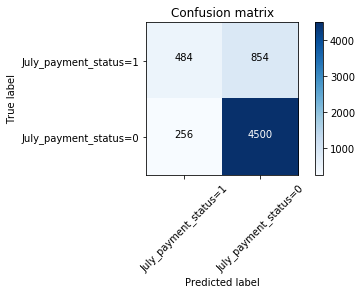

In [10]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['July_payment_status=1','July_payment_status=0'],normalize= False,  title='Confusion matrix')

In [11]:
from sklearn import metrics

In [12]:
mean_acc=metrics.accuracy_score(y_test, yhat)
print( "SVM's Accuracy:", mean_acc)

SVM's Accuracy: 0.8178536265178864
